In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot  as plt
import scipy.optimize as fit
from astropy.table import Table

In [11]:
data = Table.read('cluster_catalog.csv', format ='ascii')
df = data.to_pandas()

df = df[['Name', 'z', 'logsigma', 'e_logsigma']]
df

,Name,z,logsigma,e_logsigma
0,Abell 2717,0.049,2.73,0.04
1,Abell 2721,0.115,2.91,0.04
2,Abell 2734,0.062,2.80,0.04
3,Abell 13,0.094,2.95,0.04
4,Abell 2744,0.308,3.29,0.07
...,...,...,...,...
275,Abell 4038,0.030,2.95,0.06
276,Abell 2666,0.027,2.68,0.07
277,NGC 7777GRP,0.023,2.06,0.13
278,Abell 2670,0.076,2.96,0.03


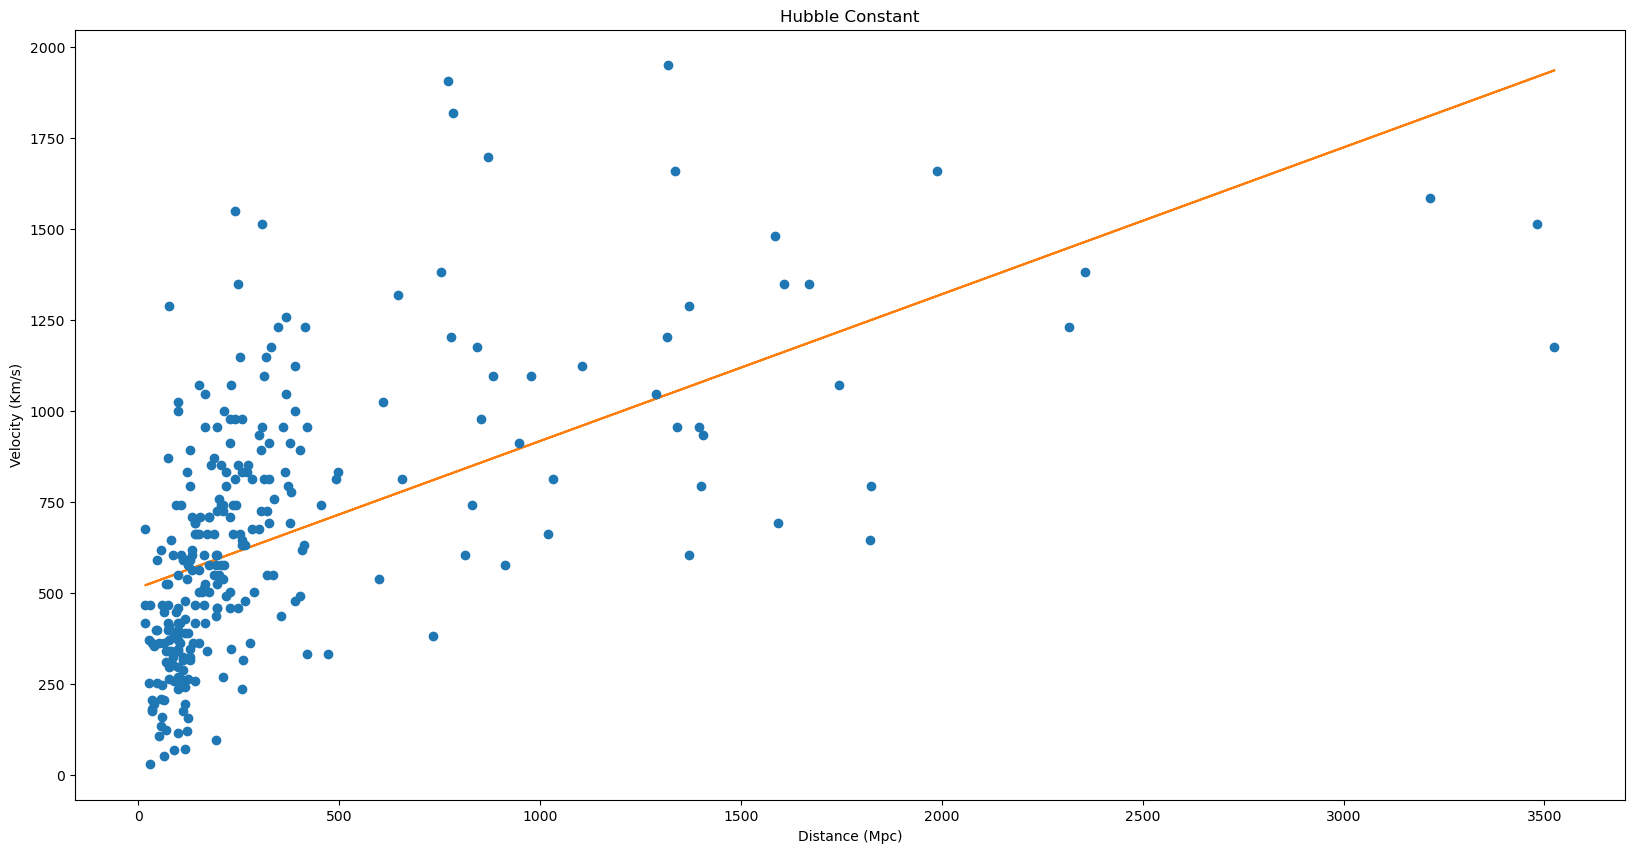

0.4033920480605188

In [10]:
file = 'cluster_catalog.csv'
data = pd.DataFrame(pd.read_csv(file))

def distance():
    return (((data["z"]) * (2.998e5)) / 70)

def velocity():
    return (10**(data["logsigma"]))

def model(x, m, b):
    return m*x + b

fit_model = model
p0 = [1/70, 2.2]
pars, cov = fit.curve_fit(fit_model, distance(), velocity(), p0 = p0)



plt.figure(figsize = (20, 10))
plt.errorbar(distance(), velocity(), yerr = 10**data["e_logsigma"], fmt = "o")
plt.plot(distance(), model(distance(), pars[0], pars[1]))
plt.title('Hubble Constant')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (Km/s)')
plt.show()

pars[0]

In [30]:

above_315 = data[data['logsigma'] > 3.2]
above_315


recno,Name,RAJ2000,DEJ2000,z,logsigma,e_logsigma,logLXbol
int32,str16,float64,float64,float64,float64,float64,float64
5,Abell 2744,3.5812499999999994,-30.388611111111107,0.308,3.29,0.07,45.8
95,Abell 750,137.27791666666664,11.03,0.18,3.28,0.03,45.3
153,Abell 1689,197.89249999999998,-1.3655555555555554,0.183,3.26,0.05,45.75
179,3C295,212.8358333333333,52.20249999999999,0.464,3.22,0.09,45.41
213,Abell 2163,243.8920833333333,-6.123888888888888,0.203,3.23,0.13,46.12
263,Abell S1077,344.7179166666666,-34.78194444444444,0.312,3.22,0.05,45.58


In [37]:
#Travel time = diameter/ velocity dispersion 

import random
n = random.uniform(0, 20)

veldisp = df['logsigma'].tolist()
veldisp

#need to do n * (3.086e19 km) / each value in the above_315 
#then * 3.15e-16 * 10e-9 to get travel time in Gyrs
#try with several random n values and plot them for each of these top 6 clusters  (should we do 6 small plots?)
# if the travel time is above 13.8 gyrs for a specific diamater, then the cluster could not support being grav bound, 
#if it is less than 13.8 for a given diameter they would be grav bound


NameError: name 'a' is not defined